In [1]:
%pylab inline
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr

Populating the interactive namespace from numpy and matplotlib


In [2]:
DATA_FOLDER = "data/"
TRAIN_FILE_PATH = DATA_FOLDER + "train.csv"
TEST_FILE_PATH = DATA_FOLDER + "test_X.csv"

In [3]:
train_data = pd.read_csv(TRAIN_FILE_PATH, header=0, encoding="big5")
train_data[train_data=="NR"] = 0

In [4]:
# concat 20 days data
trainDataByMonth = []  # 12 numpy.array, array's shape is (18, 480)
for month in range(12):
    trainDataArr = np.concatenate( [train_data[(360*month+18*day):(360*month+18*(day+1))][list(range(3, 27))].apply(pd.to_numeric).as_matrix() for day in range(20)], axis=1)
    trainDataByMonth.append(trainDataArr)

In [17]:
# concat 12 months
trainArray = np.concatenate(trainDataByMonth, axis=1)
trainArray.shape

(18, 5760)

In [18]:
y = trainArray[9]  # pm2.5
rs = []
for i in range(18):
    x = trainArray[i]
    rs.append((pearsonr(x, y)[0], i))
rs.sort()
rs

[(-0.26419606699150588, 11),
 (-0.084703120495559198, 16),
 (-0.062653882464370064, 10),
 (-0.045457854800903398, 17),
 (-0.017127244098764975, 0),
 (0.029970377321346154, 4),
 (0.1569902509201471, 15),
 (0.18613793589058564, 14),
 (0.25465706210058381, 1),
 (0.28311942447198313, 2),
 (0.29177825675276536, 3),
 (0.352159395277446, 13),
 (0.35667002125619601, 7),
 (0.37083080022821069, 12),
 (0.3755638147879316, 6),
 (0.44911349197154393, 5),
 (0.77642643236535214, 8),
 (1.0, 9)]

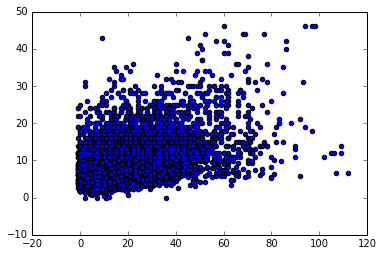

In [23]:
scatter(y, trainArray[5])